# Transfer Learning for text reviews with Word2Vec and LSTM

Jonathan Ellis

CS 344 Final Project

# Vision
This goal of this project is to design a machine learning model that will take a runner's text analysis of their race and
quantify their attitude and effort. This will allow coaches and team leaders to get a better idea of the mentality of
each runner and the team as a whole, helping them develop a better plan to help the team improve after a race. The
inspiration for this project came from my coaches on the Calvin University Cross Country team. They emphasize the importance of focusing on attitude and effort in
competition since these two factors are some of the only controllable elements in running. Because of this emphasis, our team developed
a [post-race analysis website](calvinpostrace.herokuapp.com) so every runner could write about how their race went and rate themselves for attitude and
effort on a scale from 1-10. The data from this website are used to train the model. However, since there are so few samples
from the website, a model is first trained on an Amazon Reviews dataset before being applied to the post-race data so that the
post-race model has some insights before training even begins.

# Background
The post-race website is hosted using [MongoDB](https://www.mongodb.com/) which is a document database that stores data
as objects in JSON-like documents. This data could be easily trained using a model from [Keras](https://keras.io/) / [TensorFlow](https://www.tensorflow.org/).
I chose to use these technologies because we had a lot of experience with them in class. In order to train the model using
Keras, the data must first be converted into vector representations using Word2Vec.
## Word2Vec
[Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html) is a function implemented by Gensim. According to Wikipedia[[1]](https://en.wikipedia.org/wiki/Word2vec), “Word2vec is a
group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks
that are trained to reconstruct linguistic contexts of words.” It was created by Thomas Mikolov at Google in 2013[[1]](https://en.wikipedia.org/wiki/Word2vec). It takes
in a lot of text data and produces a "vector space" representation where similar words are close to each other in the space.
These word embeddings[[13]](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture) are created using 2 primary techniques. 

#### 1. Continuous Bag of Words
The Continuous Bag of Words, or CBOW, technique takes a window of surrounding context words to predict a target word. The order of the context
words does not influence prediction, hence the term "Bag of Words."
#### 2. Skip-gram
The Skip-gram technique uses a word to predict the surrounding context words. It will weigh words that are closer to the target
word in context more than words that are farther away.

This diagram[[2]](https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-6-doc2vec-603f11832504) illustrates these architectures.

![](https://miro.medium.com/max/1102/1*6YmcrrGj1_wAmv0BQBarhw.png)

As you can see, in CBOW the surrounding context words are weighted and summed to produce a target word. In Skip-gram,
the opposite occurs where an input word is used to make the projection and weighted to predict the surrounding context words.

## LSTM
Long Short-Term Memory[[3]](https://en.wikipedia.org/wiki/Long_short-term_memory), or LSTM, was proposed by Sepp Hochreiter and Jurgen Smidhuber[[4]](https://www.mitpressjournals.org/doi/10.1162/neco.1997.9.8.1735)
in 1997. It is a recurrent neural network which solves the vanishing gradient problem[[5]](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).
Tradional RNNs[[6]](https://en.wikipedia.org/wiki/Recurrent_neural_network) "can keep track of arbitrarily long dependencies in the input sequences."[[3]](https://en.wikipedia.org/wiki/Long_short-term_memory) This means that when run with back-propogation,
the gradient can trend toward 0 and "vanish" making learning halt. LSTMs solve this by allowing gradients to "flow unchanged" [[3]](https://en.wikipedia.org/wiki/Long_short-term_memory).
By eliminating the vanishing gradient problem, LSTMs are able to have "long" short-term memory since it doesn't "forget" important
information when dealing with long sequences because some of the weights are near 0. This allows LSTMs to remember more information,
which helps them better determine which information in the sequence is most relevant.

## Transfer Learning
Transfer learning[[7]](https://en.wikipedia.org/wiki/Transfer_learning) is the process of taking stored information from a
previously solved problem and applying it to a different yet similar problem. Take a look at this simple Venn diagram[[8]](http://www.gmatfree.com/module-999/venn-diagrams-and-the-overlapping-set-equation/).

![](http://www.gmatfree.com/wp-content/uploads/2014/07/ScreenHunter_156-Oct.-13-14.53.jpg)

Suppose A is the domain of one problem and B is the domain of another. The model for domain A will be able to obtain some
amount of knowledge about the domain. By giving this knowledge to the model for domain B, it will be able to start
with some information about the overlapping section of the two domains, which can help the model learn more effectively.
The more the two domains overlap, the more effective transfer learning becomes.

## K-fold Cross-Validation
K-fold cross-validation is a statistical technique that analyzes how the results of a model will generalize to an independent
dataset[[9]](https://en.wikipedia.org/wiki/Cross-validation_(statistics).

![](https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg)

The data are iterated over k times each of which has a new "fold" of data. On each iteration, the testing set is shifted
such that all data will be tested once. This method is extremely important when working with small datasets since one
small testing set is not very likely to be representative of the whole dataset.

# Implementation
## Amazon Reviews Model
In order to train the Amazon Reviews model, I followed a blog post[[10]](https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-11-cnn-word2vec-41f5e28eda74)
by Ricky Kim. This guided me through creating an embedding matrix for the Embedding layer using Word2Vec. I followed a lesson[[11]](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb)
by Francois Chollet in order to implement LSTM using Keras. And I was able to implement transfer learning by referencing a blog post[[12]](https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/)
by Jason Chownlee. By referencing these posts, I was able train word vectors using Word2Vec, implement LSTM, and apply the model using transfer learning.
While these sources provided guidance for the project, they dealt with quite different datasets from the Amazon reviews dataset,
which resulted in some pretty major adjustments from the sources. One of the biggest changes I had to make was with the target values.
The sources specify a binary classification while this dataset is a multiclass classification problem since the ratings
are on a 1-5 scale. Other changes included cleaning the reviews and changing the way Word2Vec was implemented to avoid using Doc2Vec.

First, the train and test datasets are loaded using [pandas](https://pandas.pydata.org/). I used only about 1/3 of the
training data because my computer did not have enough memory to handle 3,000,000 samples. The data are then cleaned by
using [re](https://docs.python.org/3/library/re.html) to remove all non-letters and convert to lowercase. The [nltk library](https://www.nltk.org/)
is then used to split the reviews into a list of words in order to remove excess whitespace. The data are also split into X and Y sets.

In [ ]:
import pandas as pd
from nltk.tokenize import WordPunctTokenizer
import re

def clean_reviews(df):
    tokenizer = WordPunctTokenizer()
    cleaned_reviews = []
    for review in df:
        letters_only = re.sub("[^a-zA-Z]", " ", review)
        lower_case = letters_only.lower()
        words = tokenizer.tokenize(lower_case)
        cleaned_reviews.append((" ".join(words)).strip())
    return pd.DataFrame(cleaned_reviews, columns=['review'])

amzn_train_df = pd.read_csv('train.csv', names=['rating', 'title', 'review'])
amzn_test_df = pd.read_csv('test.csv', names=['rating', 'title', 'review'])

amzn_train_X = clean_reviews(amzn_train_df['review'])['review']
amzn_train_Y = amzn_train_df['rating']

amzn_test_X = clean_reviews(amzn_test_df['review'])['review']
amzn_test_Y = amzn_test_df['rating']
amzn_all_X = pd.concat([amzn_train_X, amzn_test_X])

The reviews are then tokenized using the Keras tokenizer and preprocessed by converting the texts to sequences and padding
them all to the same length.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

NUM_WORDS = 30000
MAX_LENGTH = 250

def preprocess_reviews(df, tokenizer):
    sequences = tokenizer.texts_to_sequences(df)
    return pad_sequences(sequences, maxlen=MAX_LENGTH)

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(amzn_all_X)

amzn_train_X = preprocess_reviews(amzn_train_X, tokenizer)
amzn_test_X = preprocess_reviews(amzn_test_X, tokenizer)

The embedding matrix is then created by using the [gensim](https://pypi.org/project/gensim/) module's Word2Vec function.
Both the train and test dataset are used to train the word vectors. The vectors, as well as the tokenizer, are then used
to create the embedding matrix. The feature vectors are encoded with both Continuous Bag of Words and Skip-gram techniques.

In [ ]:
import numpy as np
from gensim.models.word2vec import Word2Vec
import multiprocessing
from sklearn import utils

VECTOR_DIM = 100

def reviews_to_word_list(list_reviews):
    tokenizer = WordPunctTokenizer()
    reviews = []
    for text in list_reviews:
        txt = tokenizer.tokenize(text)
        reviews.append(txt)
    return reviews

processed_reviews = reviews_to_word_list(amzn_all_X)
cores = multiprocessing.cpu_count()

model_cbow = Word2Vec(sg=0, size=VECTOR_DIM // 2, negative=5, window=2, min_count=2, workers=cores)
model_cbow.build_vocab(processed_reviews)
model_cbow.train(utils.shuffle(processed_reviews), total_examples=model_cbow.corpus_count, epochs=30)

model_sg = Word2Vec(sg=1, size=VECTOR_DIM // 2, negative=5, window=2, min_count=2, workers=cores)
model_sg.build_vocab(processed_reviews)
model_sg.train(utils.shuffle(processed_reviews), total_examples=model_sg.corpus_count, epochs=30)

embeddings_index = {}
for w in model_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_cbow.wv[w], model_sg.wv[w])
    
embedding_matrix = np.zeros((NUM_WORDS, VECTOR_DIM))
for word, i in tokenizer.word_index.items():
    if i >= NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        

The last thing to do before the model can be created is convert the labels to one-hot encoded vectors. This is done
through Keras's to_categorical function. The first column is removed since 0 is not a valid rating. 

In [ ]:
from keras.utils import to_categorical

amzn_train_Y = np.delete(to_categorical(amzn_train_Y), 0, axis=1)
amzn_test_Y = np.delete(to_categorical(amzn_test_Y), 0, axis=1)

The model now can be created. The first layer is the embedding layer and its weight are innitialized to the embedding
matrix. It has size NUM_WORDS x VECTOR_DIM. The next layer is the LSTM layer which has 32 nodes. This is relatively
small, but due to the large size of the embedding matrix, overfitting occurs really fast making it better to have fewer
nodes. The final layer is a dense layer with softmax activation. It contains the probability that the review is each of
the five possible values (1-5).

In [7]:
from keras import models
from keras import layers

amzn_model = models.Sequential()
amzn_model.add(layers.embeddings.Embedding(NUM_WORDS, VECTOR_DIM, input_length=MAX_LENGTH, weights=[embedding_matrix], trainable=True))
amzn_model.add(layers.LSTM(32))
amzn_model.add(layers.Dense(5, activation='softmax'))
amzn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          3000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 3,017,189
Trainable params: 3,017,189
Non-trainable params: 0
_________________________________________________________________


The model is then compiled and fit. It is compiled using categorical crossentropy for the loss function which is
appropriate given that the problem is multiclass classification. The optimizer used is Adam, but it's the TensorFlow
version because the Keras version has some memory issues when working with embedding layers. It is only run for 2 epochs
because the model very quickly starts overfitting because of the large embedding layer. Finally, the model is saved so
it can later be used in the post-race model.

In [8]:
import tensorflow as tf
from keras.optimizers import TFOptimizer

amzn_model.compile(optimizer=TFOptimizer(tf.optimizers.Adam()),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = amzn_model.fit(amzn_train_X,
                    amzn_train_Y,
                    epochs=2,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=2)

amzn_model.save('resources/amazon.h5')

Train on 943718 samples, validate on 104858 samples
Epoch 1/2
 - 3594s - loss: 1.0800 - accuracy: 0.5271 - val_loss: 1.0307 - val_accuracy: 0.5490
Epoch 2/2
 - 3855s - loss: 0.9941 - accuracy: 0.5675 - val_loss: 1.0156 - val_accuracy: 0.5561


## Post-race Model

The post-race model has to be quite different from the Amazon reviews model because the dataset is so much smaller. To
help combat this, K-fold cross-validation is used. Another major difference is that this model requires two output nodes,
one for attitude and one for effort. The model uses the Embedding layer from the Amazon reviews model and an LSTM layer
and uses the Dense layer for both of these output nodes.

To start, the data are loaded from MongoDB using [PyMongo](https://pymongo.readthedocs.io/en/stable/). Once loaded, the
data are extracted into X, Y1, and Y2 sets. Each analysis has 4 parts. The general thoughts, turning points, positive
and negatives, and a goal assessment. The X set consists of these 4 parts combined and separated by spaces. On the analysis
site, the attitude and effort fields are on a 1-10 scale. However, runners often do not rate themselves too poorly or
too highly meaning that most of the labels were 7-9. So, I scaled the attitude and effort features accordingly resulting
in a 1-5 scale. The Y1 set consists of the attitude labels, and the Y2 set consists of the effort labels. The data are then cleaned using the same function as the Amazon reviews
and preprocessed using the same tokenizer.

In [29]:
from pymongo import MongoClient

MONGO_URL = ''

client = MongoClient(MONGO_URL)
db = client.calvinpostrace

postrace_df = pd.concat([pd.DataFrame(db.archives.find()), pd.DataFrame(db.races.find())], ignore_index=True)

def scale_feature(feature):
    if feature < 5:
        return 1
    elif 5 <= feature <= 6:
        return 2
    elif feature == 7:
        return 3
    elif feature == 8:
        return 4
    elif feature > 8:
        return 5
    else:
        raise ValueError

analysis_list = []
attitude_list = []
effort_list = []
for index, row in postrace_df.iterrows():
    try:
        attitude = scale_feature(round(float(row.attitude)))
        effort = scale_feature(round(float(row.effort)))
        attitude_list.append(attitude)
        effort_list.append(effort)
    except ValueError:
        continue

    analysis_parts = [row.thoughts, row.positives, row.goal, row.turnpoint]
    analysis_parts = [x for x in analysis_parts if str(x) != "nan"]
    analysis_list.append(' '.join(analysis_parts))

postrace_X = clean_reviews(analysis_list)['review']
postrace_Y1 = np.array(attitude_list)
postrace_Y2 = np.array(effort_list)

postrace_X = preprocess_reviews(postrace_X, tokenizer)

Once the data are prepared, the K-fold cross-validation is ready to be done using [sklearn](https://scikit-learn.org/stable/). The model is looped through K times (in
this case 10) and for each loop the X, Y1, and Y2 train and test datasets change so that each sample is used once as
a test. The model is compiled, fit, and evaluated each time, resulting in 10 runs using the model.

The model itself is initialized to the Amazon reviews model, using the output layer to initialize both of the output
layers of the new model. The embedding layer is switched to untrainable to prevent more overfitting. The fitting of the
model is only verbose for the first run for brevity.

In [59]:
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
attitude_scores = []
effort_scores = []
attitude_confusion_matrices = []
effort_confusion_matrices = []
count = 1
verbose = 2
for train, test in kfold.split(postrace_X, postrace_Y1, postrace_Y2):
    postrace_train_Y1 = np.delete(to_categorical(postrace_Y1[train]), 0, axis=1)
    postrace_test_Y1 = np.delete(to_categorical(postrace_Y1[test]), 0, axis=1)
    postrace_train_Y2 = np.delete(to_categorical(postrace_Y2[train]), 0, axis=1)
    postrace_test_Y2 = np.delete(to_categorical(postrace_Y2[test]), 0, axis=1)
    
    amzn_model = load_model('resources/amazon.h5')
    amzn_model.layers[0].trainable = False
    input1 = layers.Input(shape=(MAX_LENGTH,))
    x = amzn_model.layers[0](input1)
    x = amzn_model.layers[1](x)
    out1 = amzn_model.layers[2](x)
    out2 = amzn_model.layers[2](x)
    postrace_model = models.Model(inputs=input1, outputs=[out1,out2])
    
    if count == 1:
        postrace_model.summary()
    else:
        verbose = 0

    postrace_model.compile(optimizer=TFOptimizer(tf.optimizers.Adam()),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = postrace_model.fit(postrace_X[train],
                        [postrace_train_Y1,postrace_train_Y2],
                        epochs=15,
                        batch_size=32,
                        validation_data=(postrace_X[test], [postrace_test_Y1, postrace_test_Y2]),
                        verbose=verbose)
    score = postrace_model.evaluate(postrace_X[test], [postrace_test_Y1, postrace_test_Y2], verbose=0)
    print("Run %d attitude accuracy: %.2f%%" % (count, score[3] * 100))
    attitude_scores.append(score[3] * 100)
    print("Run %d effort accuracy: %.2f%%" % (count, score[4] * 100))
    effort_scores.append(score[4] * 100)

    pred_Y = np.array(postrace_model.predict(postrace_X[test]))
    pred_Y1 = [np.argmax(x) for x in pred_Y[0]]
    pred_Y2 = [np.argmax(x) for x in pred_Y[1]]
    true_Y1 = [np.argmax(x) for x in postrace_test_Y1]
    true_Y2 = [np.argmax(x) for x in postrace_test_Y2]
    attitude_confusion_matrices.append(tf.math.confusion_matrix(labels=true_Y1, predictions=pred_Y1))
    effort_confusion_matrices.append(tf.math.confusion_matrix(labels=true_Y2, predictions=pred_Y2))
    
    count += 1

Model: "model_146"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_146 (InputLayer)          (None, 250)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 250, 100)     3000000     input_146[0][0]                  
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 32)           17024       embedding_3[1][0]                
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 5)            165         lstm_3[1][0]                     
                                                                 lstm_3[1][0]             

# Results

## Amazon Reviews

The model achieved 55.6% accuracy. This is extremely good considering that there are 5 possible classifications. Below
is a confusion matrix that I created by following a tutorial[14](https://androidkt.com/keras-confusion-matrix-in-tensorboard/)
and using [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/).
The results are very good as the predictions are most frequent for the correct value for all classifications, and when they
are incorrect they almost always are within 1 of the true value. I was unable to find similar work to compare my results
to because most people do binary classification with sentiment analysis.

<Figure size 432x288 with 0 Axes>

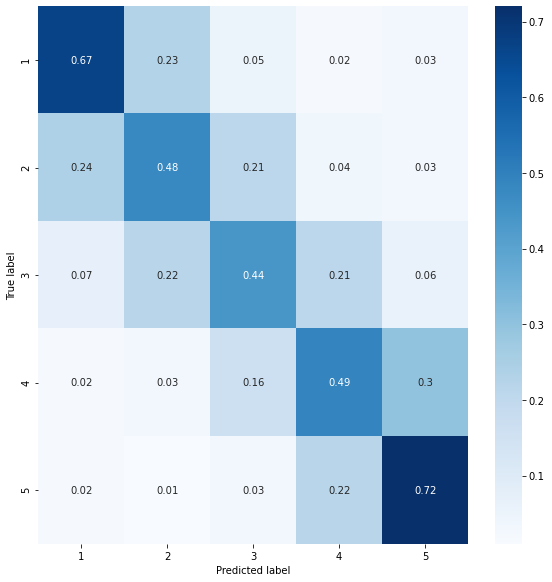

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

pred_Y = amzn_model.predict_classes(amzn_test_X)
val_Y = [np.argmax(x) for x in amzn_test_Y]
confusion_matrix = tf.math.confusion_matrix(labels=val_Y, predictions=pred_Y).numpy()
confusion_matrix = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)
confusion_matrix = pd.DataFrame(confusion_matrix, index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])

figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Post-race
This model was able to achieve 51.3% +/- 5.3% accuracy for attitude and 48.4% +/- 6.4% accuracy for effort. It started in a good place from the
Amazon reviews model and learned well from there. Again, with 5 possible classifications, this is a very good accuracy.

In [62]:
print("attitude accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(attitude_scores), np.std(attitude_scores)))
print("effort accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(effort_scores), np.std(effort_scores)))

attitude accuracy: 51.34% (+/- 5.27%)
effort accuracy: 48.36% (+/- 6.40%)


However, the accuracy is a little misleading in telling how well the model is performing. The confusion matrices below
show that while the model does contain some good trends, it is best at picking 5s which is the most frequent classification
in the dataset. This bias caused by an uneven distribution in the dataset, is one of the many problems caused by training
on small datasets.

<Figure size 432x288 with 0 Axes>

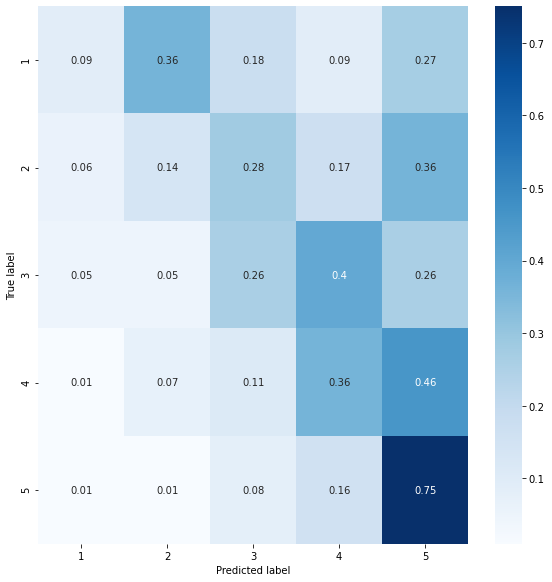

<Figure size 432x288 with 0 Axes>

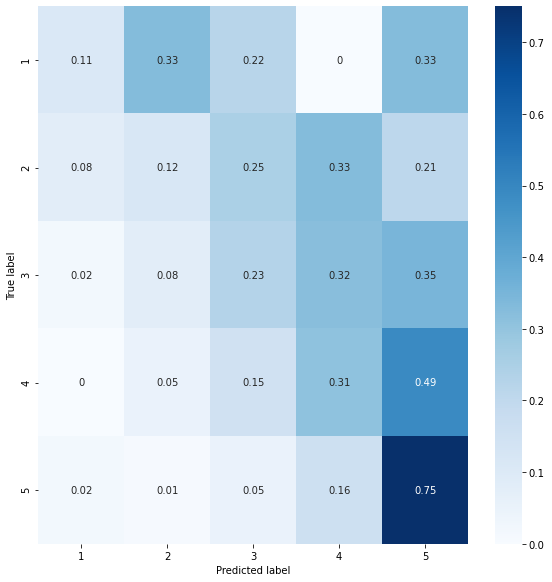

In [61]:
attitude_confusion_matrix = np.sum(np.array(attitude_confusion_matrices), axis=0)
attitude_confusion_matrix = np.around(attitude_confusion_matrix.astype('float') / attitude_confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)
attitude_confusion_matrix = pd.DataFrame(attitude_confusion_matrix, index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])

plt.clf()
figure = plt.figure(figsize=(8, 8))
sns.heatmap(attitude_confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

effort_confusion_matrix = np.sum(np.array(effort_confusion_matrices), axis=0)
effort_confusion_matrix = np.around(effort_confusion_matrix.astype('float') / effort_confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)
effort_confusion_matrix = pd.DataFrame(effort_confusion_matrix, index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])

plt.clf()
figure = plt.figure(figsize=(8, 8))
sns.heatmap(effort_confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Implications

In any project, there are resulting implications than can have both a social
and an ethical impact. In the case of this particular trained model, I find that the bias of the post-race model toward
positive results could raise concerns. The model would be contributing to the problem of overpraising. There are social
implications if everyone thinks they're a winner, or at least if they are affirmed that they have done something better
than they truly have. People, or in this case runners, could learn that they don't have to work harder for good results.
They could become content with where they are and stop training hard to do better and truly realize their goals.

In terms of transfer learning as a whole, there is a lot of potential for growth in the field. If this occurs, then
machines will become even better at learning since they can have information about many different domains. As a result,
the machine may be able to learn enough knowledge about different domains that its ability to retain information about
different topics and draw conclusions from different domains becomes similar to a human's ability. This brings up some common
questions in the field of AI, such as "is the machine truly learning or thinking?" or "can machines outperform humans in
understanding?" Transfer learning has the potential to be a very powerful field and it's important to consider the ethical
implications when working with this technology.

# References
1. https://en.wikipedia.org/wiki/Word2vec
2. https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-6-doc2vec-603f11832504
3. https://en.wikipedia.org/wiki/Long_short-term_memory
4. https://www.mitpressjournals.org/doi/10.1162/neco.1997.9.8.1735
5. https://en.wikipedia.org/wiki/Vanishing_gradient_problem
6. https://en.wikipedia.org/wiki/Recurrent_neural_network
7. https://en.wikipedia.org/wiki/Transfer_learning
8. http://www.gmatfree.com/module-999/venn-diagrams-and-the-overlapping-set-equation/
9. https://en.wikipedia.org/wiki/Cross-validation_(statistics)
10. https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-11-cnn-word2vec-41f5e28eda74
11. https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb
12. https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/
13. https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture
14. https://androidkt.com/keras-confusion-matrix-in-tensorboard/

# Libraries
- numpy: https://numpy.org/
- pandas: https://pandas.pydata.org/
- keras: https://keras.io/
- tensorflow: https://www.tensorflow.org/
- gensim: https://pypi.org/project/gensim/
- sklearn: https://scikit-learn.org/stable/
- matplotlib: https://matplotlib.org/
- seaborn: https://seaborn.pydata.org/
- nltk: https://www.nltk.org/
- pymongo: https://pymongo.readthedocs.io/en/stable/